In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import sys, os, re, glob

In [2]:
mypath = os.path.join(os.environ["HOME"], "full_pipeline")

# Ottengo i tempi di modifica dei files *.done da tutte le subdirectories
lstTempi = np.sort(np.array([os.path.getmtime(x) for x in glob.glob(os.path.join(mypath, "output", "**", "*.done"))]))

# Tempi del primo ed ultimo file
startTime = lstTempi.min()
endTime = lstTempi.max()

# Delta time
durata = endTime - startTime

print(f"Sono stati raccolti {lstTempi.shape[0]} dati in {durata/60/60:.2f} h\nUna media di {lstTempi.shape[0]/durata:.2f} al secondo, ovvero un dato ogni {durata/lstTempi.shape[0]:.2f} secondi")


Sono stati raccolti 9876 dati in 61.04 h
Una media di 0.04 al secondo, ovvero un dato ogni 22.25 secondi


In [3]:
# Calcolo quanti files da produrre

lstChiavi = [x for x in glob.glob(os.path.join(mypath, "chiavi", "*.pdbqt"))]
lstSerrature = [x for x in glob.glob(os.path.join(mypath, "serrature", "*.pdbqt"))]



(9876,)
chiaviTotProcessate = 1


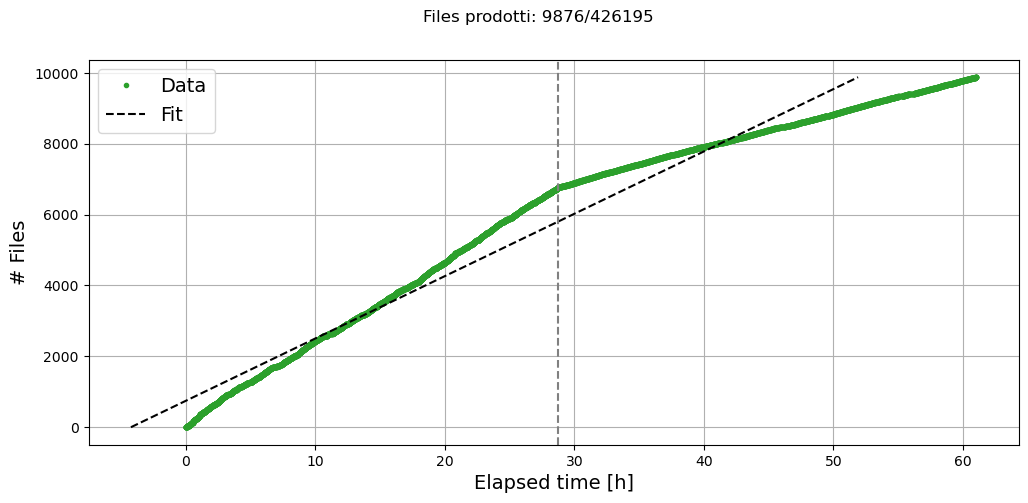

Per produrre 426195 files, se il mondo fosse lineare, ci vogliono 2419.48 ore, ovvero ancora 2358.43 ore
Per produrre 426195 files, se il mondo fosse lineare, ci vogliono 100.81 giorni, ovvero ancora 98.27 giorni


In [13]:
# Creo un vettore di interi per ciascun file prodotto
y = np.arange(1, lstTempi.shape[0]+1 )
print(y.shape)

# Numero di files da produrre
myThr = 3*len(lstChiavi)*len(lstSerrature)

# Disegno le linee al cambio di serratura
salto = 3*len(lstChiavi)
chiaviTotProcessate = np.floor(lstTempi.shape[0] / salto).astype(int)
print(f"chiaviTotProcessate = {chiaviTotProcessate}")

yall = np.arange(1, myThr + 1)

# Tempo in ore
x = (lstTempi - startTime)/60/60 # h


def myline(x, m, q):
    return m*x+q



# Fitto la retta al contrario, così posso trovare il tempo per 7400 files
startFit = 00 # ore
cond = x > startFit # Sto fittando solo da 20h in su
popt, pcov = curve_fit(myline, y[cond], x[cond])


fig, ax = plt.subplots()
fig.set_size_inches(12,5)

fig.suptitle(f"Files prodotti: {lstTempi.shape[0]}/{myThr}")

ax.plot(x, y, ls = "", marker = ".", c = "tab:green", label = "Data")
# ax.axhline(y = myThr, ls = "--", c = "tab:orange", label = "Goal")

# ax.plot(myline(yall, *popt), yall, ls = "--", c = "k", label = "Fit")
ax.plot(myline(y, *popt), y, ls = "--", c = "k", label = "Fit")
# ax.axvline(x = startFit, ls = "--", c ="tab:red", label = "Regione fit (dx)")

for i in range(chiaviTotProcessate):
    ax.axvline(x = x[(i+1)*salto-1], ls = "--", c = "grey")

ax.grid()
ax.legend(fontsize = 14)
# ax.set_yscale("log")

ax.set_xlabel("Elapsed time [h]", fontsize = 14)
ax.set_ylabel("# Files", fontsize = 14)


plt.show()

print(f"Per produrre {myThr} files, se il mondo fosse lineare, ci vogliono {myline(myThr, *popt):.2f} ore, ovvero ancora {myline(myThr, *popt) - durata/60/60:.2f} ore")
print(f"Per produrre {myThr} files, se il mondo fosse lineare, ci vogliono {myline(myThr, *popt)/24:.2f} giorni, ovvero ancora {(myline(myThr, *popt) - durata/60/60)/24:.2f} giorni")